# Сборный проект №1. Анализ GameDev индустрии.

**Описание проекта**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й

## Изучение данных

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
#прочитаем файл
df = pd.read_csv('/datasets/games.csv')
#и посмотрим на него
display(df.head(),df.tail(),df.sample(5),df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN

Name Platform  \
14518                              Kokoro no Kokoron       DS   
11802  Legend of the Guardians: The Owls of Ga'Hoole     X360   
7165                                   Crazy Climber     2600   
15258                                 Doki Majo Plus       DS   
1831                               Persona 4: Golden      PSV   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
14518           2011.0          Misc      0.00      0.00      0.03   
11802           2010.0        Action      0.06      0.01      0.00   
7165            1981.0        Action      0.21      0.01      0.00   
15258           2009.0     Adventure      0.00      0.00      0.02   
1831            2012.0  Role-Playing      0.36      0.23      0.38   

       Other_sales  Critic_Score User_Score Rating  
14518         0.00           NaN        NaN    NaN  
11802         0.01          60.0          8   E10+  
7165          0.00           NaN        NaN    NaN  
15258         0.00           NaN        NaN    NaN  
1831          0.15          93.0        9.2      M

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

None

**Выводы**:
- Некорректные название столбцов
- Неправильные типы данных по некоторым столбцам 
- Есть пропуски. Нужно разобраться что с ними делать (заменять/удалять/не трогать)
- Проверить на дубликаты (очевидные и неочевидные)

Исправим все недочёты на стадии предобработки данных

## Предобработка данных

In [3]:
#Посмотрим на названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Сами название корректны. Приведём только все к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()
#проверим
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично. \
Посмотрим на типы данных и решим, что нужно заменить

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


`year_of_release` - тип object заменим на int \
По остальным всё хорошо

In [6]:
df['year_of_release'] = pd.array(df['year_of_release'], dtype = pd.Int64Dtype())

Разберемся с пропусками 

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- `name` и `genre` имеют всего по 2 пропуска. Смысла их заменять/удалять нет, оставим ,как есть
- `year_of_release` - при предосмотре данных (методом describe) мы увидели, что год выпуска находится между 1980 и 2016. Но заменять средний или медианным значением мы не можем. Так как у нас к определенному году привяжется 269 дополнительных игр, что отразится, на дальнейшем анализе и он будет недостоверным. Оставим ,как есть.
- `critic_score`,`user_score`  - это оценочные показатели. Здесь мы тоже не можем заменять пропуски средним или медианным значеним. Так же нельзя заменить пропуски нулями (оценка "0" тоже бывает). Оставим, как есть.

In [8]:
#в рейтинге заменим пропуски на "замену-заглушку"
df['rating'] = df['rating'].fillna('without')

Таким образом, никакие пропуски не будем ни удалять, ни заменять. Оставим всё, как есть

Проверим данные на дубликаты. Сначала разберемся с неочевидными. Посмотрим на уникальные значения по возможным столбцам 

In [9]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Ух! Платформ много! Сначала я решил, что есть дублирующие варианты. Несколько минут поискать и погружение в тему игровых платформ дали ответ, что это всё разные платформы! \
Да, некоторые из них (например, N64 и NG) это часть одной большой семьи Nintendo. Но всё же они разные. Оставим всё, как есть.

In [10]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Здесь всё впорядке. Хочешь собирай пазлы, хочешь стреляй или дерись

Отдельно разберемся с абревиатурой tbd в столбце user_score

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Посмотрим на строки с этим значением 

In [12]:
df.query('user_score == "tbd"').sample(10)

name platform  year_of_release  \
4210                             Iridion 3D      GBA             2001   
9988     Cabela's North American Adventures      PS3             2010   
9257                Pet Pals: Animal Doctor      Wii             2008   
12141                  Jake Power: Handyman       DS             2008   
10012                       SingStar Latino      PS3             2009   
2460                ATV Quad Power Racing 2      PS2             2003   
14682   Barbie and Her Sisters Puppy Rescue      Wii             2015   
6760         Classic NES Series: Excitebike      GBA             2004   
2814   Beyblade VForce: Ultimate Blader Jam      GBA             2003   
15096                  AirForce Delta Storm      GBA             2002   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
4210      Shooter      0.33      0.12       0.0         0.01          53.0   
9988       Sports      0.11      0.00       0.0         0.01           NaN   
9257   Simulation      0.13      0.00       0.0         0.01           NaN   
12141   Adventure      0.06      0.00       0.0         0.00           NaN   
10012        Misc      0.11      0.00       0.0         0.01           NaN   
2460       Racing      0.41      0.32       0.0         0.11          68.0   
14682      Action      0.00      0.03       0.0         0.00           NaN   
6760       Racing      0.11      0.04       0.1         0.01          66.0   
2814       Action      0.52      0.19       0.0         0.01           NaN   
15096     Shooter      0.02      0.01       0.0         0.00          71.0   

      user_score rating  
4210         tbd      E  
9988         tbd      T  
9257         tbd   E10+  
12141        tbd      E  
10012        tbd      T  
2460         tbd      E  
14682        tbd      E  
6760         tbd      E  
2814         tbd      E  
15096        tbd      E

Пока непонятно. Разные жанры, платформы, годы выпуска и рейтинги. Гугл в помощь!

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Спасибо, Гугл!) Таким образом, это отсутвие оценки (или тот же пропуск). Так что заменим tbd на nan. И заменим весь тип данных столбца на float

In [13]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

Проверим всю таблицу на полные дубликаты

In [14]:
df.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Перед анализом данных ещё раз посмотрим на всю таблицу

In [16]:
df.sample(10)

name platform  year_of_release  \
15218  Interactive Storybook DS Series 3       DS             2007   
9437        Anno 1701: Dawn of Discovery       DS             2007   
1961                              DiRT 3      PS3             2011   
8063                  The Last Airbender       DS             2010   
15363                          So Blonde       PC             2008   
6294                      Rocky: Legends      PS2             2004   
954                 GoldenEye 007 (2010)      Wii             2010   
7838      South Park: The Stick of Truth       PC             2014   
10283                    Vacation Sports      Wii             2009   
1317                          Tamagotchi       GB             1996   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
15218          Misc      0.02      0.00      0.00         0.00           NaN   
9437     Simulation      0.07      0.05      0.00         0.01          78.0   
1961         Racing      0.27      0.57      0.01         0.20          87.0   
8063         Action      0.13      0.04      0.00         0.01          69.0   
15363     Adventure      0.00      0.02      0.00         0.00           NaN   
6294         Action      0.13      0.10      0.00         0.03          65.0   
954          Action      0.84      0.70      0.13         0.16           NaN   
7838   Role-Playing      0.07      0.10      0.00         0.01          85.0   
10283        Sports      0.09      0.01      0.00         0.01           NaN   
1317     Simulation      0.00      0.00      1.44         0.01           NaN   

       user_score   rating  total_sales  
15218         NaN        E         0.02  
9437          7.5        E         0.13  
1961          7.1        T         1.05  
8063          7.0     E10+         0.18  
15363         NaN  without         0.02  
6294          8.6        T         0.26  
954           NaN  without         1.83  
7838          8.6        M         0.18  
10283         NaN        E         0.11  
1317          NaN  without         1.45

## Исследовательский анализ данных 

**Сколько игр выпускалось в разные годы? Важны ли все периоды?**

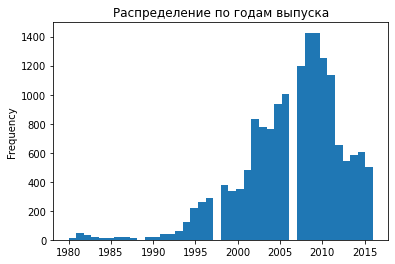

In [17]:
df['year_of_release'].plot(kind = 'hist',bins = 40)
plt.title('Распределение по годам выпуска')
plt.show()

Первые игры появились ещё в 1980 году и до 1995 года особо сфера не развилась. С появлением технологий игрушки стали более красивые, интересные, качественные. Соответственно, сфера стала приносит прибыль и игр стали выпускать всё больше и больше. Нам необходимо сделать прогноз на 2017 год, а данные до 1995 года это "прошлый век" в прямом и переносном смысле - они не важны

**Как менялись продажи по платформам?**

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [18]:
#построим сводную таблицу 
sales_by_platforms =df.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
sales_by_platforms.sort_values(('sum', 'total_sales'),ascending = False)

sum
         total_sales
platform            
PS2          1255.77
X360          971.42
PS3           939.65
Wii           907.51
DS            806.12
PS            730.86
GBA           317.85
PS4           314.14
PSP           294.05
PC            259.52
3DS           259.00
XB            257.74
GB            255.46
NES           251.05
N64           218.68
SNES          200.04
GC            198.93
XOne          159.32
2600           96.98
WiiU           82.19
PSV            54.07
SAT            33.59
GEN            30.77
DC             15.95
SCD             1.86
NG              1.44
WS              1.42
TG16            0.16
3DO             0.10
GG              0.04
PCFX            0.03

Очевидно, что первые 6 платформ ( PS2, X360, PS3, Wii, DS, PS) по доходности превосходят остальные платформы в разы ( между 6 позицией PS и 7 - GBA разрыв более, чем в 2 раза). \
Построил распределение по годам 

In [19]:
#введём отдельную df c платформами с самой высокой доходностью
top_platform_df = df.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')

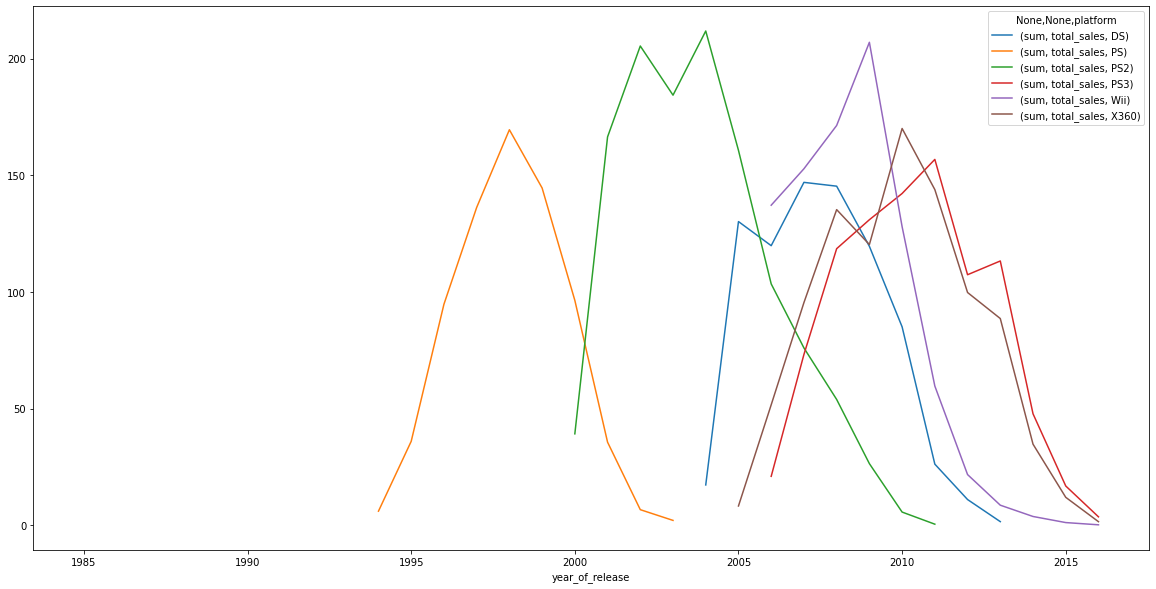

In [20]:
#построим сводную таблицу для новой df
top_platforms_by_years =top_platform_df.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
top_platforms_by_years.plot(figsize = (20,10))
plt.show()

**Выводы**: На графике отлично видно, как происходила сменяемость платформ для игр. Появление - подъем - пик - спад - смерть

Введём **АКТУАЛЬНЫЙ ПЕРИОД** данных для нашего прогноза на 2017 год. На графике выше, можно определить *время жизни* платформы. Это ориентировочно **10 лет**. По графику самый доходные платформы к 2015 году идут к своему "закату". А нам нужны платформы, которые начинают расти, находятся на пике, либо близки к уходу, но ещё действующие. \ 
Я считаю актуальный периодом нужно определить **8 лет**. То есть далее мы будем работать с данными за последние 8 лет (с 2008 года)

In [21]:
#сохраним актуальную таблицу и далее будем работать с ней
actual_df = df.query('year_of_release >= 2012')
actual_df

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
34        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
34         4.99      5.73      0.65         2.42          83.0         5.3   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           NaN         NaN   
16707      0.00      0.00      0.01         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
16           M        21.05  
23           M        16.27  
31     without        14.63  
33     without        14.60  
34           M        13.79  
...        ...          ...  
16703  without         0.01  
16707  without         0.01  
16710  without         0.01  
16712  without         0.01  
16714  without         0.01  

[2886 rows x 12 columns]

**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ**

Для начала посмотрим на платформы, которые у нас остались в актуальной таблице

In [22]:
actual_df['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Количество заметно уменьшилось. Построим для них аналогичный график

In [23]:
#посмотри на продажи по этим платформам 
sales_by_actual_platforms =actual_df.pivot_table(
                                 index = ['platform'], 
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
sales_by_actual_platforms.sort_values(('sum', 'total_sales'),ascending = False)

sum
         total_sales
platform            
PS4           314.14
PS3           288.79
X360          236.54
3DS           194.61
XOne          159.32
WiiU           82.19
PC             62.65
PSV            49.18
Wii            35.37
DS             12.55
PSP            11.19

По продажам лидируют PS3,X360 и Wii. Посмотрим на какой "стадии жизни" находятся все платформы

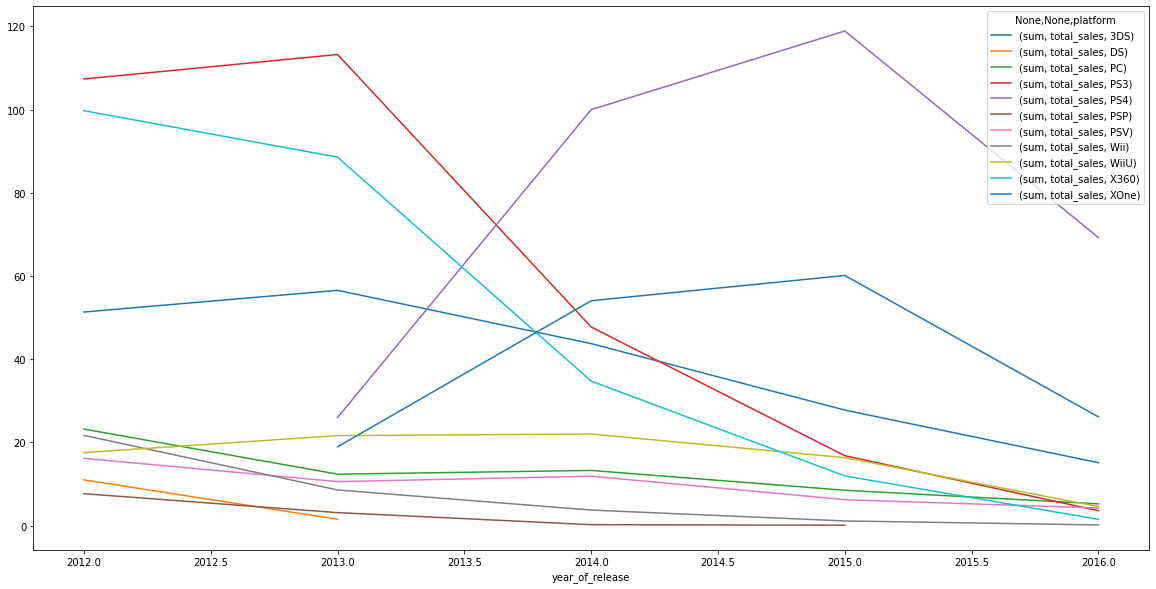

In [24]:
top_platforms_actual_df =actual_df.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
top_platforms_actual_df.plot(figsize = (20,10))
plt.show()

Большинство платформ "идут к закату". Но есть 2 потенциально прибыльные платформы: **PS4** и **Xone**

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

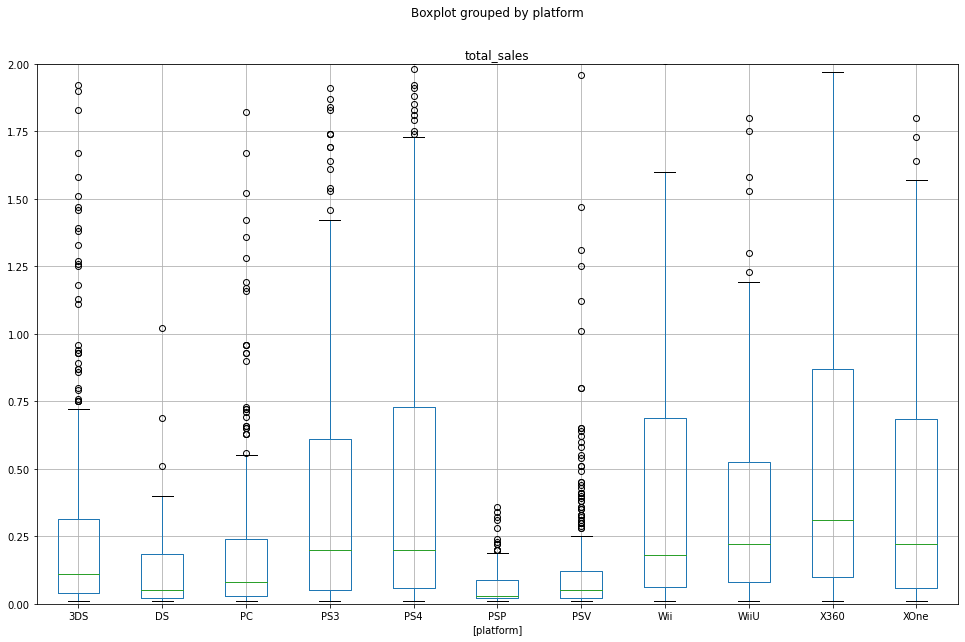

In [25]:
actual_df.boxplot(column = ['total_sales'],by = ['platform'],figsize=(16, 10))
plt.ylim([0, 2])
plt.show()

По всем платформам медианы продаж находятся на одном уровне. Немного выше остались находтся 75% квартили платформ PS3, PS4, X360, XOne

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы**

Возьмем платформу PS3

In [26]:
ps3_df = actual_df.query('platform == "PS3"')
ps3_df = ps3_df.sort_values('user_score',ascending = False)

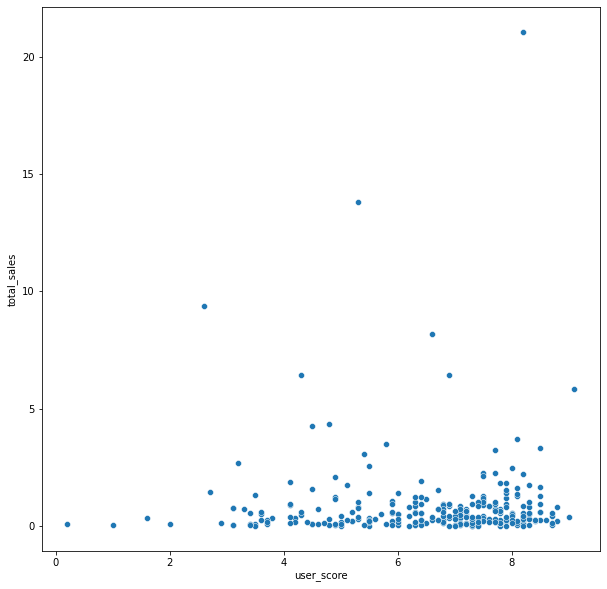

In [27]:
#посмотрим диаграммы рассеяния влияния отзывов пользователей на продажи
ps3_user_score = sns.scatterplot(data = ps3_df, x = 'user_score',y = 'total_sales')
ps3_user_score.figure.set_figwidth(10)
ps3_user_score.figure.set_figheight(10)

In [28]:
#посчитаем коэффициент корреляции 
ps3_df['user_score'].corr(ps3_df['total_sales'])

-0.005143522887113815

Оценки пользователей не влияют на продажи. Коэффициент корреляции почти равен 0.

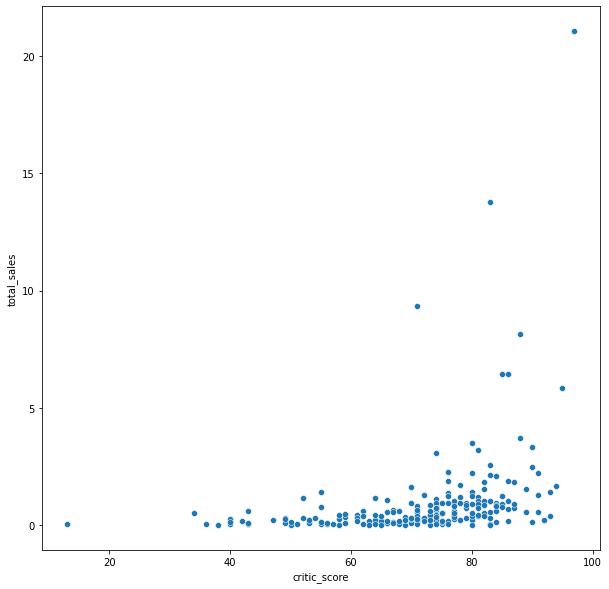

In [29]:
#посмотрим на связь оценок критиков и продажами
ps3_critic_score = sns.scatterplot(data = ps3_df, x = 'critic_score',y = 'total_sales')
ps3_critic_score.figure.set_figwidth(10)
ps3_critic_score.figure.set_figheight(10)

In [30]:
ps3_df['critic_score'].corr(ps3_df['total_sales'])

0.33149725926295914

В случае оценок критиков корреляция увеличивается ( в сравнении с оценками пользователей) , но всё равно является недостаточной, чтобы мы говорили о прямой зависимости.

Посмотрим на ситуацию на других платформах. Возьмём 2 популярные - PS4 и X360. Повторим расчеты коэффициента корреляции 

In [31]:
ps4_df = actual_df.query('platform == "PS4"')
ps4_df = ps4_df.sort_values('user_score',ascending = False)
display(ps4_df['user_score'].corr(ps4_df['total_sales']))
display(ps4_df['critic_score'].corr(ps4_df['total_sales']))

-0.03195711020455644

0.4065679020617815

In [32]:
x360_df = actual_df.query('platform == "X360"')
x360_df = x360_df.sort_values('user_score',ascending = False)
display(x360_df['user_score'].corr(x360_df['total_sales']))
display(x360_df['critic_score'].corr(x360_df['total_sales']))

0.006163978646213364

0.3605734888507337

Ситуация схожая. Оценки пользователей вообще не влияют на продажи. Критики своими хорошими отзывами немного повышают продажи, но говорить о прямой зависимости нельзя

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [33]:
popular_genre = actual_df.groupby('genre').agg({'name':'count'}).reset_index()
popular_genre.sort_values(by='name', ascending=False)

genre  name
0         Action  1031
7   Role-Playing   370
1      Adventure   302
10        Sports   268
8        Shooter   235
3           Misc   192
6         Racing   115
2       Fighting   109
4       Platform    85
9     Simulation    80
11      Strategy    71
5         Puzzle    28

С явным отрывом лидируют игры в жанре Action.

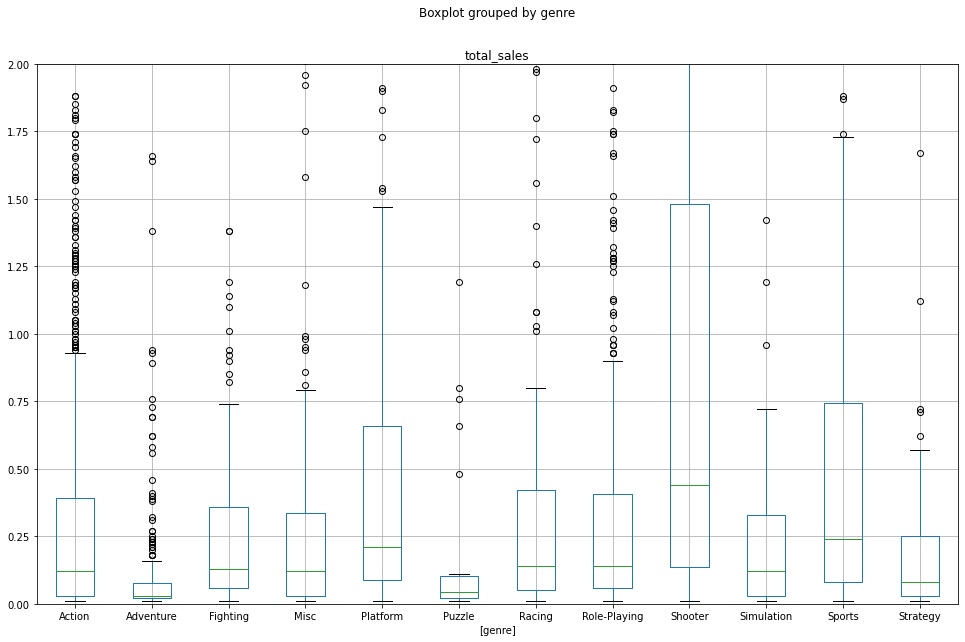

In [34]:
actual_df.boxplot(column = ['total_sales'],by = ['genre'],figsize=(16, 10))
plt.ylim([0, 2])
plt.show()

В жанре Action много выбросов (очень прибыльных игр). Из-за этого общая прибыль по жанру Action выше остальных. Но медианное значение продаж выше в жанре Shooter. Второе место по медианным продажам делят Platform и Sports

## Портрет пользователя для каждого региона 

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Cамые популярные платформы (топ-5)

Сгруппируем платформы по регионам пользования и выведем топ-5 самых популярных

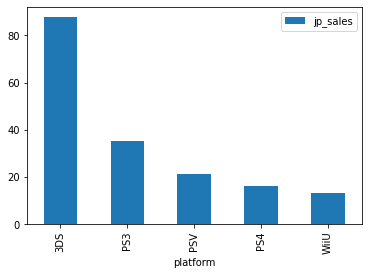

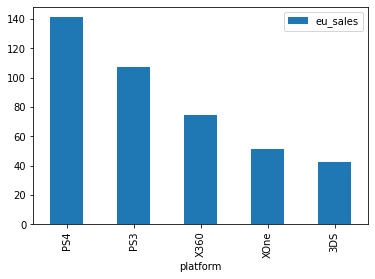

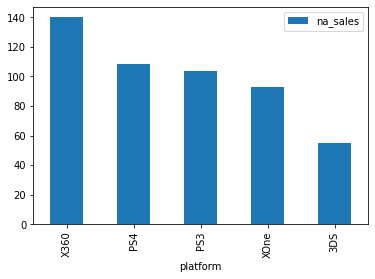

In [35]:
actual_df.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
actual_df.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
actual_df.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

У пользователей Северной Америки и Европы предпочтение схожие - в топ-5 платформ попали X360, PS3, Wii,PS4. В Японии самыми популярными оказались платформы Nintendo ( 3DS и DS)

### Самые популярные жанры (топ-5)

Повторим предыдущее действие для жанров

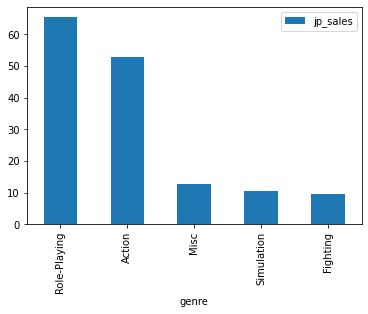

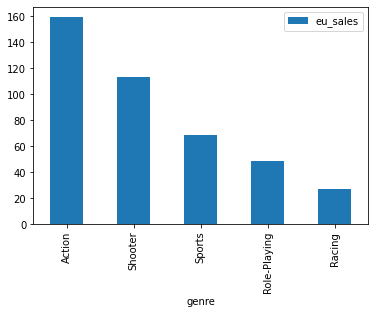

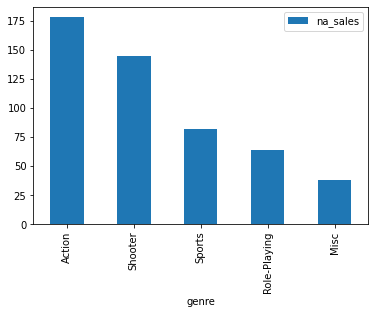

In [36]:
actual_df.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
actual_df.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
actual_df.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

Предпочтение пользователей Северной Америки и Европы полностью совпадают (топ-5). В Японии так же любят Action, Music, Sports, но самым популяорным жанром здесь стал Role-Playing

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Так же определим топ-5 

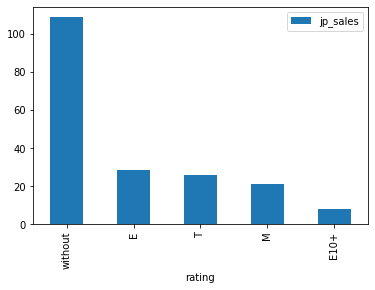

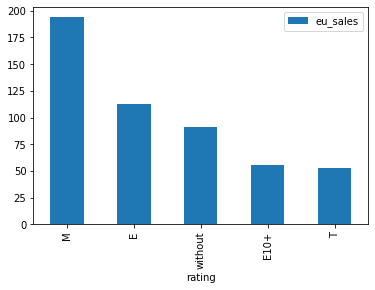

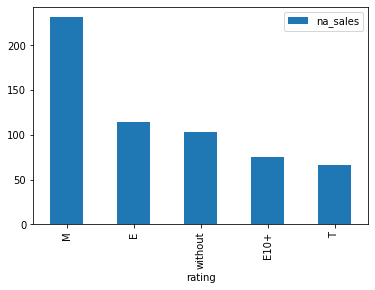

In [37]:
actual_df.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
actual_df.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
actual_df.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.show()

**Вывод**: Северной Америке и Европе ситуация одинакова. Первую пятерку составляют игры рейтинга М("Для взрослых"), E("Для всех"), игры без рейтинга, E10+("Для всех от 10 лет и старше"),T("Подросткам"). В Японии же с огромным преимуществом дидируют игры без рейтинга...С чем же это связано... \
Возможно, причина в том , что организация Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
США и Канада. Скорее всего в Японии свой рынок игр и они просто не оцениваются данной организацией.

## Проверка гипотез

### Гипотеза №1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и анльтернативную гипотезы:
- Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Так как наши выборки независимы между собой будем использовать t-критерий Стьюдента

In [38]:
#зададим alpha
alpha = .05

In [39]:
#введём 2 переменных с данными оценок по Xbox One и PC
xbox_one = actual_df[(actual_df['platform'] == 'XOne') & (actual_df['user_score'] > 0)]['user_score']
pc = actual_df[(actual_df['platform'] == 'PC') & (actual_df['user_score'] > 0)]['user_score']

In [40]:
#проведём тест
results = st.ttest_ind(xbox_one, pc)

In [41]:
#выведем результат
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет

### Гипотеза №2

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Сформулируем нулевую и альтернативную гипотезы:
- H0: Средние пользовательские рейтинги жанров Action и Sports равны
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются 

Здесь так же будем использовать t-критерий Стьюдента

In [42]:
action = actual_df[(actual_df['genre'] == 'Action') & (actual_df['user_score'] > 0)]['user_score']
sport = actual_df[(actual_df['genre'] == 'Sports') & (actual_df['user_score'] > 0)]['user_score']

In [43]:
results = st.ttest_ind(action, sport)

In [44]:
#выведем результат
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод**: Средние пользовательские рейтинги жанров Action и Sports различаются

## Общий вывод

- Первые игры появились ещё в 1980 году и до 1995 года особо сфера не развилась. С появлением технологий игрушки стали более красивые, интересные, качественные. Соответственно, сфера стала приносит прибыль и игр стали выпускать всё больше и больше.
- Перспективные платформы: PS4 и Xone
- У пользователей из Европы и Северной Америки похожие предпочтения, в Японии больше любят Role-Playing игры и Nintendo
- Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет
- Средние пользовательские рейтинги жанров Action и Sports различаются

Потенциальная успешность игры в первую очереди зависит от региона и пользователей , которые будут в неё играть. Например, в Японии и Европе различаются предпочтения пользователей и чтобы спланировать рекламные кампании нужно акцентировать внимание на жанрах игры, интересных в каждом регионе. \
То же касается платформ для игр - Мы должны выпускать игры для новых, перспективных платформ, так как цикл жизни одной платформы очень короткий
Таким образом, закономерности, определяющие успешность игры:
- Акцентируем внимание на рынке пользования игры. Если хотим успешных продаж в Европе и Америке - выбираем игры в жанре Action, Shooter, Sports
- Выбираем перспективныe платформы (PS4, XOne)